<a href="https://colab.research.google.com/github/eunwoo63/My-ex-girlfriend-who-s-always-late/blob/main/%EB%A9%94%ED%83%80%ED%81%B4%EB%9F%BD%20%EB%AC%B8%EC%9D%98%EB%82%B4%EC%97%AD%20%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,971 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [3]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.8 MB/s eta 0:00:00


In [7]:
# 데이터 파일 불러오기
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from konlpy.tag import Okt
import re

text = open('/content/drive/MyDrive/문의목록.txt').read()
text

'어플이 개좆같네요\n계좌이체로 충전해야 하는데, 안 됩니다. 자꾸 "펌뱅킹 거절 비정상데이터", "펌뱅킹거절주민번호"와 같은 문구가 뜹니다. 어떻게 해야 하나요\n세탁기가 연결되고 동작버튼에 결제까지 되었는데 세탁기가 작동을 안합니다\n"쿠팡 포인트줌 참여는 5월말부터 했는데\n적립예정으로만 뜨고 언제 적립해주시나요?\n안내사항에는 결제후 한달 이후에 적립해준다고 되어있는데 5월 28일 결제건은 한달 넘었는데 미적립이네요\n언제 적립해주나요?"\n무료 포인트받기 활동 참여했으나 포인트가 지급되지 않음\n건조기 돈만 먹고 사용안됨\n문상을 충전하고 전환을 했는데 스팀월렛이 문자나 이메일로 안와요\n"건조기\n작동 없이 돈만 나가서 환불 꼭 문의함"\n환불이 되어 계좌에 돈이 들어왔는데 아직 환불완료가 안 됐다고 하여 회원탈퇴를 할 수 없는데 이것도 앱에서 하기까지 시간이 조금 걸리나요??\n포인트가 지급되지 않습니다\n세탁기 안 돌아가는데 결제되었어요;; 돈 돌려주세요\n쿠팡포인트줌을통해 적립한 적립예정포인트가 확정포인트로 전환이안되네요 31일이후로 전환되는게 아니었나요  빠른답변부탁드려요\n네이버 페이 포인트로 전환했는데 네이버에 돈이 안들어왔어요.\n아직 스팀웰렛이 안들어왔습미다 그냥 안들어와서 환불요청 합니다\n4일에 환불 신청했는데 언제 되나요\n"본인 사용을 위한 구글 기프트카드 5000원 3매\n\n대한민국에서만 사용할 수 있는 코드입니다며 사용불가\n현재 대한민국에 거주 중"\n"머니환불 기간에 대해 문의 드립니다.\n영업일기준 15일 이후에 지급이 되는데 이건 너무 오래 걸립니다.. 다른 비슷한 포인트 어플과 비교하면 다른곳은 익영업일에 바로 입금을 해주는데 영업일 기준 15일은 개선이 필요하다고 생각합니다.. 아마 머니 환불하는 이용자들이 많을텐데 이렇게 계속 지급 기간을 유지하시면  지속적으로 이용자들이 줄어들고 굳이 메타클럽을 사용할 메리트가 저 또한 없다고 느껴집니다.. 머니 환불기간 개선 고려해주세요 "\n환불한 2000원이 아직도 들어

In [9]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import nltk
from collections import Counter
from google.colab import files

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
token = nltk.word_tokenize(text) #텍스트 토큰화(나누기)

# 글자수에 따라 분류할 불용어 정리
filter_1word = ['을','는','이','가','에','또','은','를', '의', '로', '와', '과']
filter_2word = ['저희', '우리', '으로', '따라', '의해', '에게', '다른', '또한' ,'물론' ,'설사', '비록', '타다', '부터', '여기', '이곳', '까지', '로서', '로써', '겨우', '단지', '다만', '훨씬', '약간', '다소', '조금', '만약', '각각', '각자', '되어', '마저', '있다', '했다', '없다', '에요', '이다', '한다', '되는']
filter_3word = ['하지만', '그래서', '뿐이다', '그리고', '그러나', '그런데', '더라도', '아니면', '몰라도', '따라서', '앞에서', '대해서', '대하여', '대하면', '얼마나', '하물며', '반대로', '다음에', '이지만', '관하여', '어째서', '하물며', '지든지', '비교적', '비하면', '의해서', '로부터', '더불어', '마저도', '합니다', '했어요', '해봐요', '습니까', '습니다', '위해서', '반대로', '하면서', '어떻게', '만약에', '심지어', '까지도', '여전히', '조차도', '하여금', '아무도', '어쨋든', '으로서']
filter_4word = ['예를 들면', '하지마라', '이용하여', '그리하여', '이리하여', '보는데서', '해야한다', '일것이다', '할수있다', '할줄안다', '할수있어', '얼마만큼', '그렇지만', '이외에도', '해야한다', '더욱이는', '하더라도', '할지라도', '일지라도', '일것이다', '하게하다', '할만하다', '불구하고', '얼마든지', '마음대로', '하면된다', '말하자면', '시작하여', '해도좋다', '해도된다', '가까스로', '할줄안다', '할지언정', '할지라도', '그중에는', '아무거나', '아니라면', '하는것도', '어떤것들', '다음으로', '왜냐하면', '관해서는', '하고있다', '그만이다']
new_token = []

# 4자리 글자부터 순서대로 텍스트 조회 및 삭제
for a in token:
  if a.endswith(tuple(filter_4word)):
    new_word = a[:-4]
    if len(new_word) > 1:
      new_token.append(new_word)
  elif a.endswith(tuple(filter_3word)):
    new_word = a[:-3]
    if len(new_word) > 1:
      new_token.append(new_word)
  elif a.endswith(tuple(filter_2word)):
    new_word = a[:-2]
    if len(new_word) > 1:
      new_token.append(new_word)
  elif a.endswith(tuple(filter_1word)):
    new_word = a[:-1]
    if len(new_word) > 1:
      new_token.append(new_word)

# Counter를 이용해서 중복되는 단어의 수를 집계
counter = Counter(new_token)
counter_sort = sorted(counter.items(), key = lambda x:x[1], reverse = True)

In [11]:
# 정렬본 확인
counter_sort

[('포인트', 2688),
 ('충전', 1318),
 ('문자', 1268),
 ('전환', 1022),
 ('결제', 822),
 ('세탁기', 767),
 ('네이버페', 756),
 ('네이버페이', 741),
 ('건조기', 699),
 ('오류', 586),
 ('환불', 580),
 ('않았', 536),
 ('상품권', 508),
 ('작동', 484),
 ('문화상품권', 462),
 ('코드', 445),
 ('메타포인트', 433),
 ('스마일캐시', 432),
 ('연결', 426),
 ('페이', 417),
 ('메타머니', 387),
 ('탈퇴', 372),
 ('번호', 355),
 ('적립', 354),
 ('감사', 354),
 ('사용', 331),
 ('문의', 328),
 ('수수료', 320),
 ('세탁', 313),
 ('금액', 309),
 ('쿠폰', 307),
 ('계좌', 306),
 ('요청', 300),
 ('카드', 279),
 ('방법', 268),
 ('지급', 256),
 ('신청', 250),
 ('기프트카드', 233),
 ('답변', 224),
 ('메타클럽', 219),
 ('어디', 212),
 ('회원가입', 210),
 ('되었', 196),
 ('제대', 190),
 ('문상', 186),
 ('네이버포인트', 186),
 ('확인', 182),
 ('시간', 181),
 ('계정', 180),
 ('문제', 179),
 ('첨부', 178),
 ('때문', 174),
 ('메세지', 170),
 ('실수', 170),
 ('계좌이체', 161),
 ('반환', 161),
 ('감사하겠', 158),
 ('회원탈퇴', 152),
 ('내역', 152),
 ('사진', 150),
 ('버튼', 149),
 ('등록', 145),
 ('스마일캐쉬', 139),
 ('카톡', 137),
 ('안왔', 136),
 ('동의', 130),
 ('죄송', 129),
 ('메시지', 125),
 

In [12]:
# 워드 클라우드 진행을 위한 wordcloud 라이브러리와 matplot 설치
!pip install wordcloud
!pip install matplotlib-venn

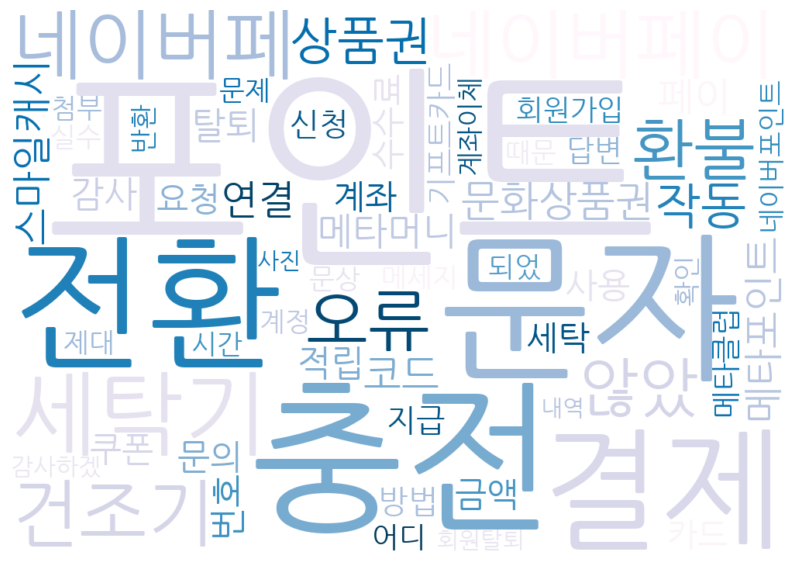

In [13]:
# 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path= path , background_color="white", width=1000, height=700, max_words=60, max_font_size=280,colormap = 'PuBu')  # 워드클라우드 상세설정
wc.generate_from_frequencies(dict(counter_sort))
wc.to_file('result_text_mining.png')
plt.figure(figsize=(10,10))  # 워드클라우드 사이즈 설정
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
